In [8]:
from plotnine import *
import pandas as pd
import os 
import numpy as np

In [2]:

ref_lengths=(pd.read_csv('../run_k-6_l-2/transcript_lengths.bed',sep='\t', names=['seqid', 'start', 'end']) 
                .assign(length= lambda x: x['end'] - x['start'])
                .drop(columns=['seqid']) )
dummy_lengths=(pd.read_csv('../run_k-6_l-2/dummy_tx.bed',sep='\t', names=['seqid', 'start', 'end', 'name']) 
                .assign(length= lambda x: x['end'] - x['start'])
                .drop(columns=['seqid'])   )

compare distributions

/data/swamyvs/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 419'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)
/data/swamyvs/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 74 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/data/swamyvs/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


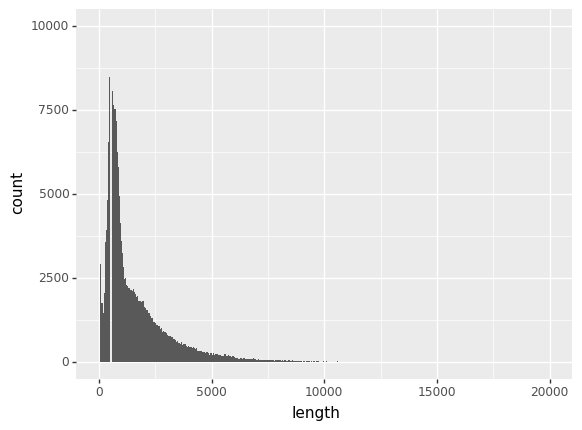

<ggplot: (-9223369104764283381)>

In [33]:
(ggplot(ref_lengths)+
 aes(x='length')+
 geom_histogram()+
 ylim(0,10000)+
 xlim(0,20000)
)

/data/swamyvs/anaconda3/lib/python3.7/site-packages/plotnine/stats/stat_bin.py:93: PlotnineWarning: 'stat_bin()' using 'bins = 481'. Pick better value with 'binwidth'.
  warn(msg.format(params['bins']), PlotnineWarning)
/data/swamyvs/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:360: PlotnineWarning: stat_bin : Removed 18 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)
/data/swamyvs/anaconda3/lib/python3.7/site-packages/plotnine/layer.py:452: PlotnineWarning: geom_histogram : Removed 4 rows containing missing values.
  self.data = self.geom.handle_na(self.data)


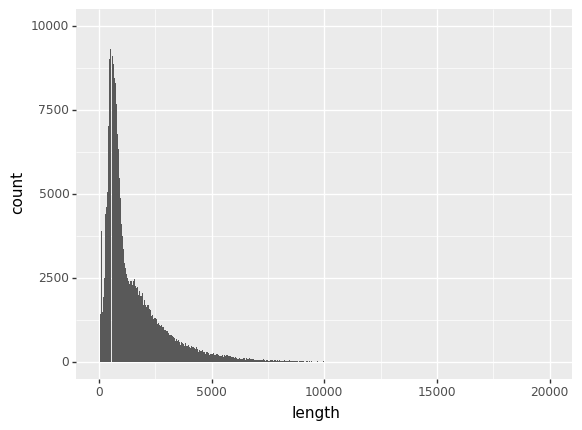

<ggplot: (-9223369104763649890)>

In [6]:
(ggplot(dummy_lengths)+
 aes(x='length')+
 geom_histogram()+
 ylim(0,10000)+
 xlim(0,20000)
)

In [11]:
ref_lengths['length'].quantile(np.linspace(0,1,11))

0.0       100.0
0.1       423.0
0.2       545.0
0.3       593.0
0.4       728.0
0.5       895.0
0.6      1214.0
0.7      1716.0
0.8      2372.0
0.9      3587.0
1.0    205012.0
Name: length, dtype: float64

In [13]:
dummy_lengths['length'].quantile(np.linspace(0,1,11))

0.0      100.0
0.1      417.0
0.2      541.0
0.3      587.0
0.4      712.0
0.5      868.0
0.6     1144.0
0.7     1623.0
0.8     2242.0
0.9     3337.0
1.0    37027.0
Name: length, dtype: float64

In [14]:
sum(ref_lengths['length'] > 37000)

14

so there are only 14 tx in the ref set that are longer than the max od dummy 

In [22]:
ref_lengths['length'].quantile(np.linspace(.9,1,5))

0.900      3587.00
0.925      4120.00
0.950      4888.05
0.975      6288.05
1.000    205012.00
Name: length, dtype: float64

In [23]:
dummy_lengths['length'].quantile(np.linspace(.9,1,5))

0.900     3337.00
0.925     3828.00
0.950     4508.35
0.975     5714.00
1.000    37027.00
Name: length, dtype: float64

So looks like there was no need to spoof the lengths, and I should sample directly from the reference length distribution

In [36]:
ntx_wins=(pd.read_csv('../run_k-6_l-2/nontranscribed_windows.bed', sep='\t', names=['seqid', 'start', 'end'])
         .assign(length= lambda x: x['end'] - x['start']))

In [37]:
ntx_wins['length'].describe()

count    3.217200e+04
mean     3.711538e+04
std      7.813616e+04
min      1.000000e+00
25%      4.044750e+03
50%      1.291400e+04
75%      3.663000e+04
max      2.489784e+06
Name: length, dtype: float64